In [1]:
import environment
import util
import Satellite
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import os
import pandas as pd

In [2]:
# 设置仿真参数
FIELD_SIZE = (4000, 4000)  # 40m x 40m场地，单位为cm
SAMPLING_TIME = 0.001  # 采样时间，单位为秒
N_UE = 1  # XR-UE的数量
M_SBS = 2  # SBS的数量
UE_SPEED = 8  # XR-UE的速度，单位为cm/s
UE_DIRECTION = random.randint(0, 359)  # XR-UE的初始移动方向


In [3]:
parm = [
    #BS1
    {"pos": (2000, 2000, 40),
    "freq": 800,
    "numerology": 1, 
    "power": 20,
    "gain": 16,
    "loss": 3,
    "bandwidth": 20,
    "max_bitrate": 1000},
    
    #BS2
    {"pos": (1000, 1000, 40),
    "freq": 1700,
    "numerology": 1, 
    "power": 1,
    "gain": 5,
    "loss": 1,
    "bandwidth": 40,
    "max_bitrate": 1000},

    # #BS3
    # {"pos": (2000, 500, 40),
    # "freq": 1900,
    # "numerology": 1, 
    # "power": 1,
    # "gain": 5,
    # "loss": 1,
    # "bandwidth": 40,
    # #15
    # "max_bitrate": 1000},

    # #BS4
    # {"pos": (3000, 1000, 40),
    # "freq": 2000,
    # "numerology": 1, 
    # "power": 1,
    # "gain": 5,
    # "loss": 1,
    # "bandwidth": 25,
    # "max_bitrate": 55},

    # #BS5
    # {"pos": (3000, 3000, 40),
    # "freq": 1700,
    # "numerology": 1, 
    # "power": 1,
    # "gain": 5,
    # "loss": 1,
    # "bandwidth": 40,
    # "max_bitrate": 1000},

    # #BS6
    # {"pos": (2000, 3500, 40),
    # "freq": 1900,
    # "numerology": 1, 
    # "power": 1,
    # "gain": 5,
    # "loss": 1,
    # "bandwidth": 40,
    # "max_bitrate": 1000},

    # #BS7
    # {"pos": (1000, 3000, 40),
    # "freq": 2000,
    # "numerology": 1, 
    # "power": 1,
    # "gain": 5,
    # "loss": 1,
    # "bandwidth": 25,
    # "max_bitrate": 1000}
]

In [4]:
env = environment.wireless_environment(FIELD_SIZE[0], SAMPLING_TIME)
# 添加SBS
sbs_ids = []
for i in range(len(parm)):
    # position = (random.randint(0, FIELD_SIZE[0]-1), random.randint(0, FIELD_SIZE[1]-1), 35)  # 高度设置为2.5m，即250cm
    bs_id = env.place_NR_base_station(parm[i]["pos"], parm[i]["freq"], parm[i]["numerology"], parm[i]["power"], parm[i]["gain"], parm[i]["loss"], parm[i]["bandwidth"], total_bitrate = parm[i]["max_bitrate"])
    sbs_ids.append(bs_id)

# 添加XR-UE
ue_ids = []
for i in range(N_UE):
    starting_position = (1500, 1500, 1)
    ue_id = env.insert_ue(0, starting_position, UE_SPEED, UE_DIRECTION)
    ue_ids.append(ue_id)


0
[0, 1]


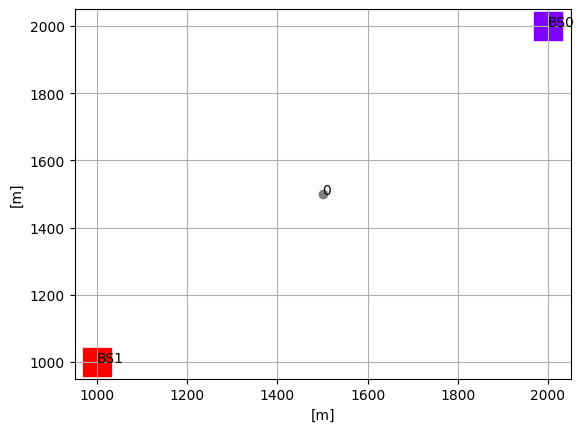

In [5]:

print(env.wardrop_beta)

util.plot(ue_ids, sbs_ids, env)



In [6]:
env.initial_timestep();

{0: -91.36163772333094, 1: -104.86300429518545}
{0: -91.36163772333094, 1: -104.86300429518545}
self.requested_bitrate 50
self.env.wardrop_beta 0.4933633860144145
self.env.sampling_time 1
len(rsrp) 2
len(self.env.ue_list) 1


In [7]:
# 模拟切换过程和统计信息收集
SELECTED_UE = 3
for step in range(600):  # 仿真迭代次数
    for ue_id in ue_ids:
        ue = util.find_ue_by_id(ue_id)
        print(ue_id, ue.old_position)
        # 更新UE的连接状态，这里应该包含切换逻辑
        # ue.update_connection()
        # rsrp = env.discover_bs(SELECTED_UE)
        # sinr = {}
        # for bsc in rsrp:
        #     sinr[bsc] = util.find_bs_by_id(bsc).compute_sinr(rsrp)
        # print("SINR: ", sinr)

        # prb_dict = {}
        # for elem in util.find_ue_by_id(SELECTED_UE).bs_bitrate_allocation:
        #     if util.find_bs_by_id(elem).bs_type != "sat" and SELECTED_UE in util.find_bs_by_id(elem).ue_pb_allocation:
        #         prb_dict[elem] = util.find_bs_by_id(elem).ue_pb_allocation[SELECTED_UE]
        #     elif util.find_bs_by_id(elem).bs_type == "sat" and SELECTED_UE in util.find_bs_by_id(elem).ue_allocation:
        #         prb_dict[elem] = util.find_bs_by_id(elem).ue_allocation[SELECTED_UE]/64
        # print("PRB: ",prb_dict)
    # util.plot(ue_ids, sbs_ids, env)
        
    env.next_timestep()

0 (1500, 1500)
{0: -107.34236351398624, 1: -111.65581302017826}
0 (1500, 1500)
{0: -107.35422243800133, 1: -111.61669994268055}
0 (1493.3676994195596, 0.001)
{0: -107.36622343156549, 1: -111.57792667504509}
0 (1486.7353988391192, 0.001)
{0: -107.37834482723707, 1: -111.53946302819578}
0 (1480.1030982586788, 0)
{0: -107.39061390097078, 1: -111.5013638622746}
0 (1473.4707976782383, 0.001)
{0: -107.40300204796276, 1: -111.46358653224137}
0 (1466.838497097798, 0)
{0: -107.41553644289436, 1: -111.42618643981966}
0 (1460.2061965173575, 0.001)
{0: -107.42818856401462, 1: -111.38912048157702}
0 (1453.573895936917, 0)
{0: -107.44098548352548, 1: -111.35244458732117}
0 (1446.9415953564767, 0.001)
{0: -107.45389876484847, 1: -111.31611519006935}
0 (1440.3092947760363, 0)
{0: -107.46695537653943, 1: -111.28018873307239}
0 (1433.6769941955959, 0.001)
{0: -107.48012696927171, 1: -111.24462118063715}
0 (1427.0446936151554, 0)
{0: -107.49344040682726, 1: -111.20946947366791}
0 (1420.412393034715, 0.00